In [1]:
import pandas as pd 

In [3]:
#Importing the Kaggle medical cost personal data set 
insurance_america = pd.read_csv("insurance_data.csv") 

In [4]:
insurance_america.head() 

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
insurance_america.describe() 

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [6]:
import pandas_profiling 

In [12]:
pandas_profiling.ProfileReport(insurance_america)  

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
#Creating dummies for the categorical variables 
insurance_america = pd.get_dummies(insurance_america, drop_first = True) 

In [14]:
#Checking the dummy variables 
insurance_america.head() 

age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0

In [15]:
from sklearn.linear_model import LinearRegression 

In [20]:
#Creating two new variables, one with the charges column and one with every variable expect charges column 
y = insurance_america["charges"] 
X = insurance_america.drop(columns = "charges") 
model = LinearRegression() 
model.fit(X, y) 

LinearRegression()

In [21]:
#pull out the R-squared value by using the score method - this is a pretty good r squared value 
model.score(X, y) 

0.7509130345985207

In [22]:
#Coefficient for the intercept 
model.intercept_ 

-11938.538576167164

In [23]:
#Coefficient for the others 
model.coef_ 

array([  256.85635254,   339.19345361,   475.50054515,  -131.3143594 ,
       23848.53454191,  -352.96389942, -1035.02204939,  -960.0509913 ])

In [26]:
#Combining coefficient with their variable names 
pd.DataFrame(
{
    "Variable": X.columns.values, 
    "Coefficient" : model.coef_
}) 
#Assuming all other factors remain the same, age increases the price by 256, bmi increases the price by 339, 
#for every increase in children the price rises by 475, however being a male decreases the price, smoking 
#increases the price most at 23848 and all regions appear to decrease the price. 
#NOTE: we do not have the p values so drawing conclusions is tough 

Variable   Coefficient
0               age    256.856353
1               bmi    339.193454
2          children    475.500545
3          sex_male   -131.314359
4        smoker_yes  23848.534542
5  region_northwest   -352.963899
6  region_southeast  -1035.022049
7  region_southwest   -960.050991

In [27]:
#The statsmodels API provides an 'ordinary least squares' OLS() function 
import statsmodels.api as sm 

In [28]:
#We need to add the intercept to model 
X_i = sm.add_constant(X)

X_i.head() 

const  age     bmi  children  sex_male  smoker_yes  region_northwest  \
0    1.0   19  27.900         0         0           1                 0   
1    1.0   18  33.770         1         1           0                 0   
2    1.0   28  33.000         3         1           0                 0   
3    1.0   33  22.705         0         1           0                 1   
4    1.0   32  28.880         0         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0

In [30]:
sm_model = sm.OLS(y, X_i).fit() 
print(sm_model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 11 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:51:21   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

Text(0, 0.5, 'Residual')

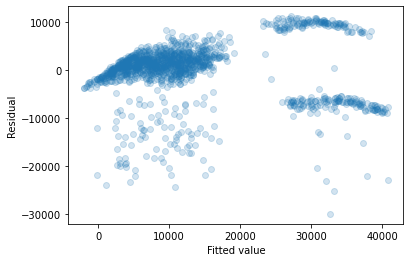

In [31]:
#Diagnostic plots - these do not look great 
residuals = sm_model.fittedvalues - y

import matplotlib.pyplot as plt
plt.scatter(x = sm_model.fittedvalues, y = residuals, alpha = 0.2)
plt.xlabel("Fitted value")
plt.ylabel("Residual") 

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([-29992.76441723, -25301.45642514, -24365.73964599, ...,
          11029.9225851 ,  11037.85163648,  11304.90666616])),
 (5739.981970166988, 3.411621680634475e-12, 0.9480196405428852))

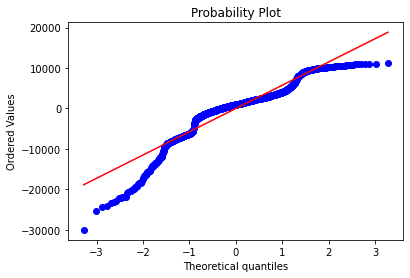

In [32]:
import scipy as sp
sp.stats.probplot(residuals, dist = "norm", plot = plt, fit = True) 

In [35]:
#It might be worth trying this model again but dropping the sex_male and region_northwest columns (p > 0.5) 


KeyError: "['sex'] not found in axis"

In [36]:
insurance_america_two = pd.get_dummies(insurance_america, drop_first = True) 

In [43]:
insurance_america_two = insurance_america_two.drop('sex_male', 1)

In [45]:
insurance_america_two = insurance_america_two.drop('region_northwest', 1)

In [48]:
insurance_america_two.head() 

age     bmi  children      charges  smoker_yes  region_southeast  \
0   19  27.900         0  16884.92400           1                 0   
1   18  33.770         1   1725.55230           0                 1   
2   28  33.000         3   4449.46200           0                 1   
3   33  22.705         0  21984.47061           0                 0   
4   32  28.880         0   3866.85520           0                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0

In [55]:
y2 = insurance_america_two["charges"] 
X2 = insurance_america_two.drop(columns = "charges") 
model2 = LinearRegression() 
model2.fit(X2, y2) 

LinearRegression()

In [56]:
model2.score(X2, y2) 

0.7507813973504049

In [57]:
model2.intercept_ 

-12165.38243635567

In [59]:
model2.coef_ 

array([  257.00639063,   338.64133473,   471.54414442, 23843.87493295,
        -858.46964184,  -782.74522982])

In [60]:
pd.DataFrame(
{
    "Variable": X2.columns.values, 
    "Coefficient" : model2.coef_
}) 

Variable   Coefficient
0               age    257.006391
1               bmi    338.641335
2          children    471.544144
3        smoker_yes  23843.874933
4  region_southeast   -858.469642
5  region_southwest   -782.745230

In [61]:
X_i2 = sm.add_constant(X2)

X_i2.head() 

const  age     bmi  children  smoker_yes  region_southeast  \
0    1.0   19  27.900         0           1                 0   
1    1.0   18  33.770         1           0                 1   
2    1.0   28  33.000         3           0                 1   
3    1.0   33  22.705         0           0                 0   
4    1.0   32  28.880         0           0                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0

In [62]:
sm_model2 = sm.OLS(y, X_i2).fit() 
print(sm_model2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Thu, 11 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:11:28   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.217e+04    949.538  

Text(0, 0.5, 'Residual')

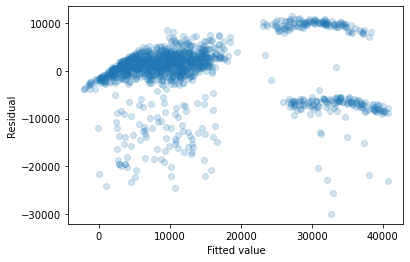

In [63]:
#The diagnostic plots do not look improved and the data may be more suited to a clustering technique 
residuals2 = sm_model2.fittedvalues - y2

import matplotlib.pyplot as plt
plt.scatter(x = sm_model2.fittedvalues, y = residuals2, alpha = 0.2)
plt.xlabel("Fitted value")
plt.ylabel("Residual") 

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([-29926.41173463, -25553.29808296, -24425.77883653, ...,
          10863.49830865,  11097.39905189,  11377.06887087])),
 (5742.300670783607, 1.7333130427862446e-11, 0.9481520926645716))

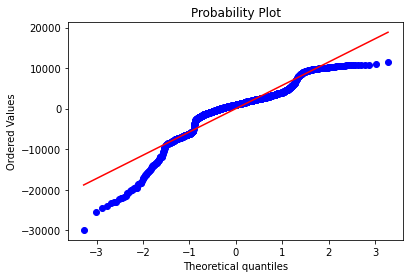

In [64]:
sp.stats.probplot(residuals2, dist = "norm", plot = plt, fit = True) 